In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../Datasets/car_price_prediction.csv')

In [3]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [4]:
df = df.drop(columns=["ID", "Doors"])

In [5]:
df = df[~(df["Levy"] == '-')]

In [6]:
df['Mileage'] = df['Mileage'].str.split(' ').str.get(0).astype('int')

In [7]:
cols = ['Price', 'Mileage', "Levy"]

df[cols] = df[cols].astype('float')

for col in cols:
    quartiles = df[col].quantile([0.1, 0.7])
    q1 = quartiles.loc[0.1]
    q3 = quartiles.loc[0.7]

    low_bound = q1 - 1.5 * (q3 - q1)
    upp_bound = q3 + 1.5 * (q3 - q1)

    df = df[(df[col] >= low_bound) & (df[col] <= upp_bound)]


In [8]:
df['Price'].value_counts()

Price
470.0      235
392.0      228
314.0      188
627.0      180
549.0      169
          ... 
15900.0      1
5849.0       1
49723.0      1
12100.0      1
22075.0      1
Name: count, Length: 1700, dtype: int64

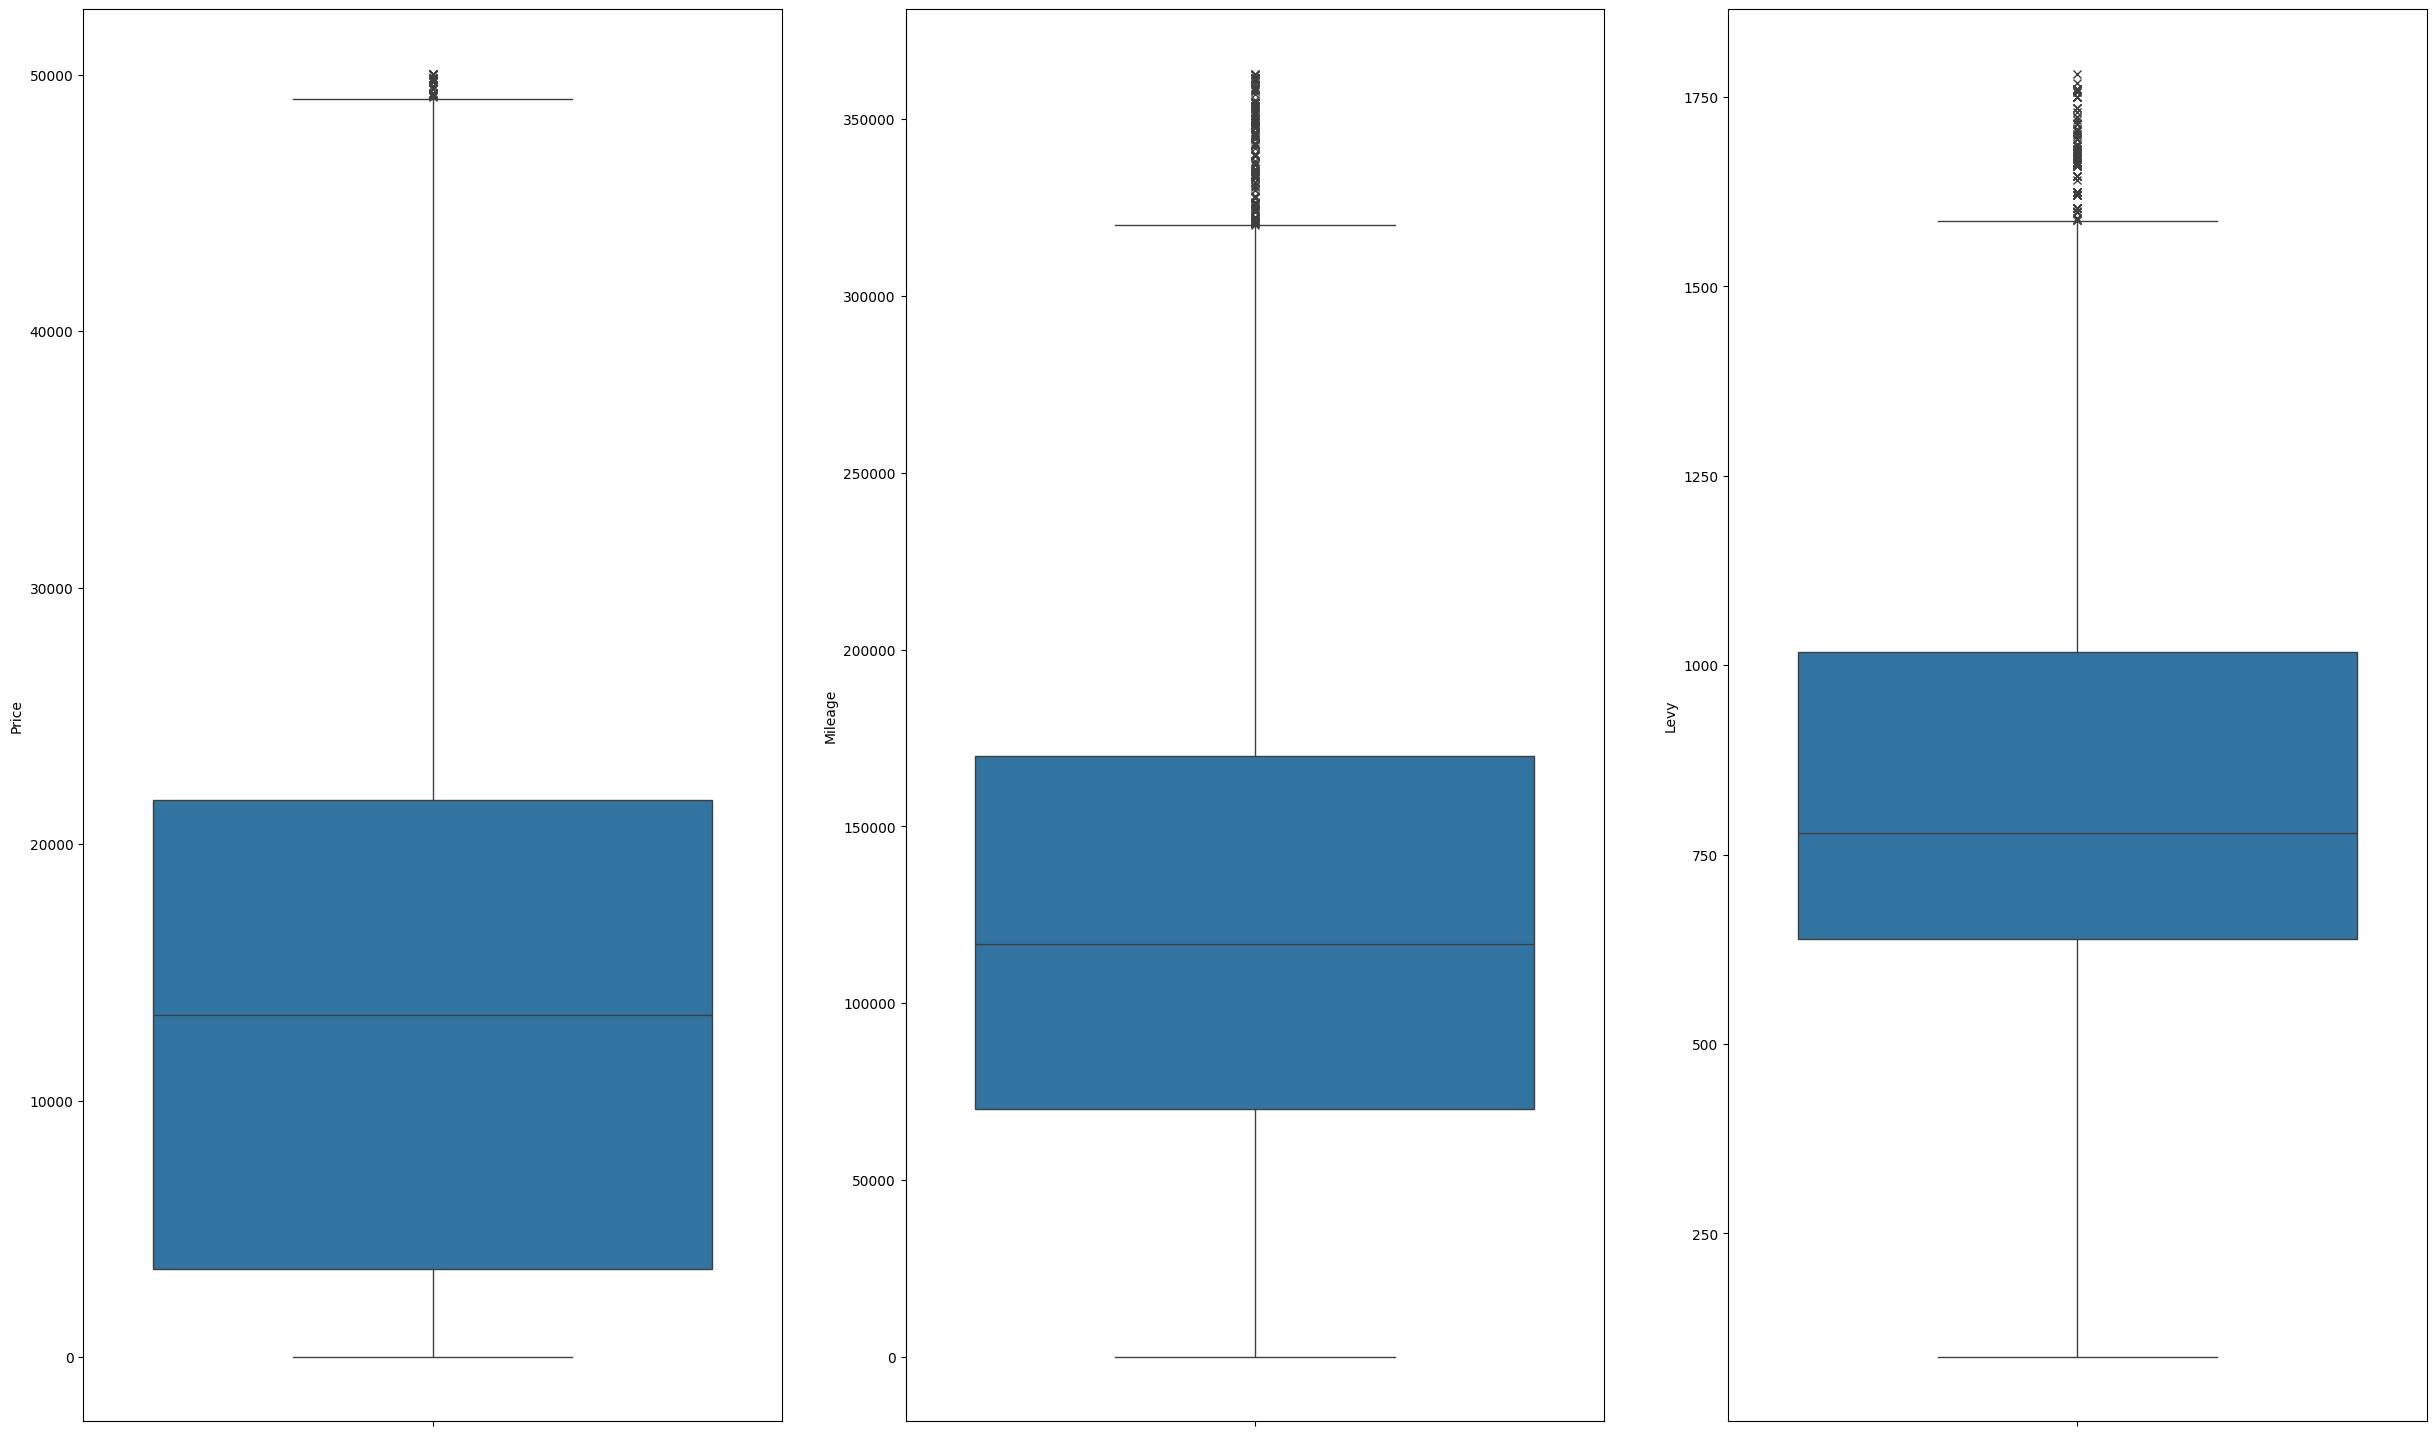

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(25, 15))

sns.boxplot(df['Price'], flierprops={"marker": "x"}, ax=axes[0])

sns.boxplot(df['Mileage'], flierprops={"marker": "x"}, ax=axes[1])

sns.boxplot(df['Levy'], flierprops={"marker": "x"}, ax=axes[2])

plt.tight_layout(pad=3)

plt.show()

In [10]:
cols = ["Manufacturer", "Model", "Prod. year", "Category", "Leather interior", "Fuel type", "Engine volume", "Gear box type",
        "Drive wheels", "Wheel", "Color"]

def label_encode(df, columns_to_encode):
    for column in columns_to_encode:
        le = LabelEncoder()
        df.loc[:, column] = le.fit_transform(df[column])

    return df

df = label_encode(df, cols)

In [11]:
columns = [ "Mileage", "Levy", "Price"]
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [12]:
df = df.astype('float')

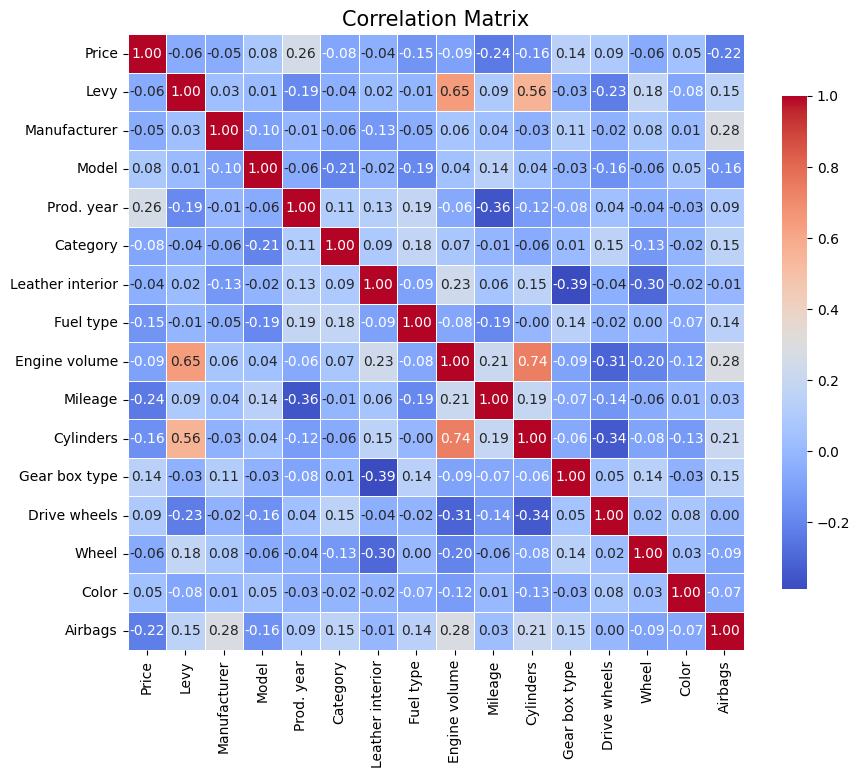

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', size=15)
plt.show()


In [14]:
df.to_csv('../Cleaned Datasets/prices_cleaned.csv')

In [15]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=["Price"])
y = df["Price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


svr_rbf = SVR(kernel='rbf', C=20, gamma='auto')
svr_test = svr_rbf.fit(X_train, y_train)

y_pred = svr_rbf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mse**.5
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Absolute Error: 0.348474586052093
Mean Squared Error: 0.3183973774827409
Root Mean Squared Error: 0.5642671153653568
R-squared score: 0.699657234872084


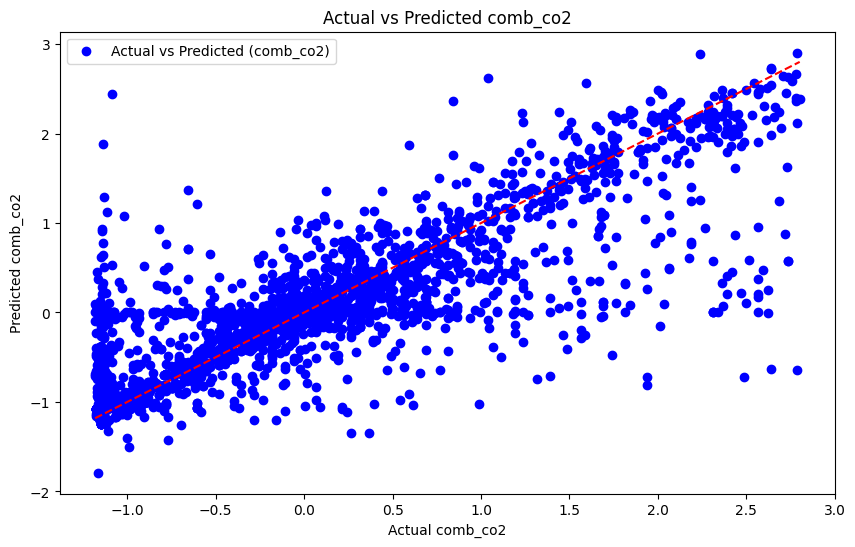

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted (comb_co2)')
plt.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], color='red', linestyle='--')
plt.xlabel('Actual comb_co2')
plt.ylabel('Predicted comb_co2')
plt.title('Actual vs Predicted comb_co2')
plt.legend()
plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


model = RandomForestRegressor(n_estimators = 150, max_features = 'sqrt', max_depth = 20, random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mse**.5
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Absolute Error: 0.2600402710483108
Mean Squared Error: 0.19151752860708404
Root Mean Squared Error: 0.4376271570721863
R-squared score: 0.8193424061244525


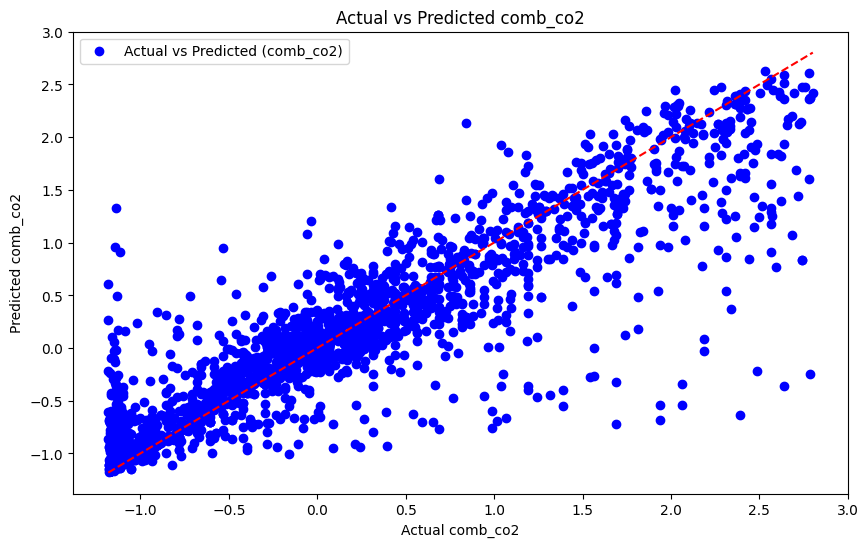

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted (comb_co2)')
plt.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], color='red', linestyle='--')
plt.xlabel('Actual comb_co2')
plt.ylabel('Predicted comb_co2')
plt.title('Actual vs Predicted comb_co2')
plt.legend()
plt.show()